In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.drop('customerID', axis= 1, inplace=True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df1 = df.copy()

In [12]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [13]:
df1["TotalCharges"] = pd.to_numeric(df1['TotalCharges'], errors = 'coerce')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
df1.dropna(inplace=True)

In [17]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df1.shape

(7032, 20)

In [20]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
for i in df1:
    print(i, "- ", df[i].unique())

gender -  ['Female' 'Male']
SeniorCitizen -  [0 1]
Partner -  ['Yes' 'No']
Dependents -  ['No' 'Yes']
tenure -  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService -  ['No' 'Yes']
MultipleLines -  ['No phone service' 'No' 'Yes']
InternetService -  ['DSL' 'Fiber optic' 'No']
OnlineSecurity -  ['No' 'Yes' 'No internet service']
OnlineBackup -  ['Yes' 'No' 'No internet service']
DeviceProtection -  ['No' 'Yes' 'No internet service']
TechSupport -  ['No' 'Yes' 'No internet service']
StreamingTV -  ['No' 'Yes' 'No internet service']
StreamingMovies -  ['No' 'Yes' 'No internet service']
Contract -  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -  ['Yes' 'No']
PaymentMethod -  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -  [29.85 56.95 53

In [22]:
df1.replace('No internet service', 'No', inplace=True)

In [23]:
df1.replace('No phone service', 'No', inplace=True)

In [24]:
for i in df1:
    print(i, "- ", df1[i].unique())

gender -  ['Female' 'Male']
SeniorCitizen -  [0 1]
Partner -  ['Yes' 'No']
Dependents -  ['No' 'Yes']
tenure -  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService -  ['No' 'Yes']
MultipleLines -  ['No' 'Yes']
InternetService -  ['DSL' 'Fiber optic' 'No']
OnlineSecurity -  ['No' 'Yes']
OnlineBackup -  ['Yes' 'No']
DeviceProtection -  ['No' 'Yes']
TechSupport -  ['No' 'Yes']
StreamingTV -  ['No' 'Yes']
StreamingMovies -  ['No' 'Yes']
Contract -  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -  ['Yes' 'No']
PaymentMethod -  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges -  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn -  ['No' 'Yes']


In [25]:
df1.replace({'Yes':1, 'No':0, 'Female':0, 'Male':1}, inplace=True)

In [26]:
for i in df1:
    print(i, "- ", df1[i].unique())

gender -  [0 1]
SeniorCitizen -  [0 1]
Partner -  [1 0]
Dependents -  [0 1]
tenure -  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService -  [0 1]
MultipleLines -  [0 1]
InternetService -  ['DSL' 'Fiber optic' 0]
OnlineSecurity -  [0 1]
OnlineBackup -  [1 0]
DeviceProtection -  [0 1]
TechSupport -  [0 1]
StreamingTV -  [0 1]
StreamingMovies -  [0 1]
Contract -  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -  [1 0]
PaymentMethod -  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges -  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn -  [0 1]


In [27]:
final = pd.get_dummies(data=df1, drop_first=True)

In [28]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [29]:
tenure0 = final[final['Churn']==0].tenure
tenure1 = final[final['Churn']==1].tenure

In [30]:
tenure0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [31]:
tenure1

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [32]:
import matplotlib.pyplot as plt

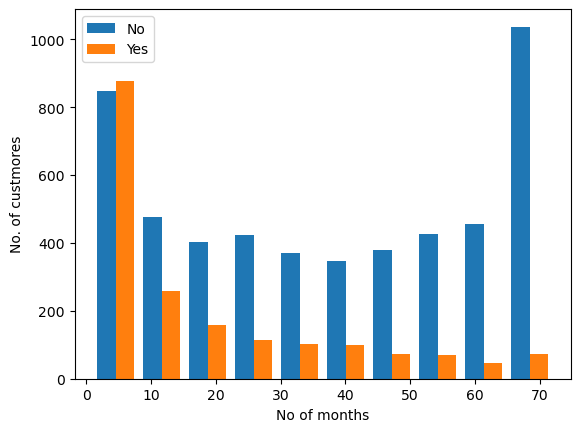

In [33]:
plt.hist([tenure0, tenure1], label=['No', 'Yes'])
plt.legend()
plt.xlabel('No of months')
plt.ylabel('No. of custmores')
plt.show()

In [34]:
MonthlyCharges0 = final[final['Churn']==0].MonthlyCharges
MonthlyCharges1 = final[final['Churn']==1].MonthlyCharges

In [35]:
MonthlyCharges0

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64

In [36]:
MonthlyCharges1

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

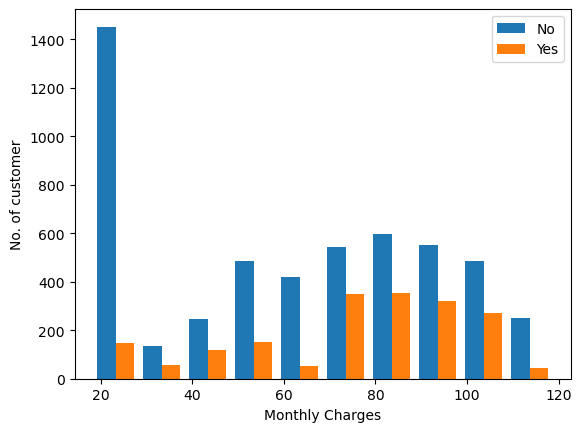

In [37]:
plt.hist([MonthlyCharges0, MonthlyCharges1], label = ['No', 'Yes'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('No. of customer')
plt.show()

In [38]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [39]:
X = final.drop('Churn', axis=1)

In [40]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [41]:
y = final.Churn

In [42]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
scaled = scaler.fit_transform(X)

In [46]:
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [47]:
scaled.shape

(7032, 23)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.20, random_state=42)

In [50]:
X_train.shape

(5625, 23)

In [51]:
X_test.shape

(1407, 23)

In [52]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(23, ), activation='sigmoid')
])

In [53]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['Accuracy'])

In [54]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


176/176 [==============================] - 3s 4ms/step - loss: 0.7281 - Accuracy: 0.5422
Epoch 2/10
176/176 [==============================] - 1s 3ms/step - loss: 0.5911 - Accuracy: 0.6823
Epoch 3/10
176/176 [==============================] - 1s 3ms/step - loss: 0.5497 - Accuracy: 0.7275
Epoch 4/10
176/176 [==============================] - 1s 3ms/step - loss: 0.5222 - Accuracy: 0.7508
Epoch 5/10
176/176 [==============================] - 0s 3ms/step - loss: 0.5021 - Accuracy: 0.7671
Epoch 6/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4870 - Accuracy: 0.7744
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4754 - Accuracy: 0.7803
Epoch 8/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4664 - Accuracy: 0.7844
Epoch 9/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4591 - Accuracy: 0.7852
Epoch 10/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4531 - Accuracy: 0.78

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (23, ), activation='relu', kernel_initializer='ones',bias_initializer= 'Zeros'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [56]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['Accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 2s 3ms/step - loss: 1.0147 - Accuracy: 0.7125
Epoch 2/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4436 - Accuracy: 0.7902
Epoch 3/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4306 - Accuracy: 0.7947
Epoch 4/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4263 - Accuracy: 0.7957
Epoch 5/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4256 - Accuracy: 0.7964
Epoch 6/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4346 - Accuracy: 0.7929
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4260 - Accuracy: 0.7972
Epoch 8/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4250 - Accuracy: 0.7975
Epoch 9/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4287 - Accuracy: 0.7957
Epoch 10/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4281 - Accuracy: 0.7995

In [58]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4594 - Accuracy: 0.7662


[0.4593662917613983, 0.7661691308021545]

In [59]:
pred = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [60]:
pred

array([[0.02702816],
       [0.20569366],
       [0.8389241 ],
       ...,
       [0.15702115],
       [0.415518  ],
       [0.01162936]], dtype=float32)

In [61]:
predicted= []
for i in pred:
    if i > 0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [62]:
predicted

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [63]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted)

In [64]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[833, 200],
       [129, 245]])>

In [65]:
import seaborn as sns

<Axes: >

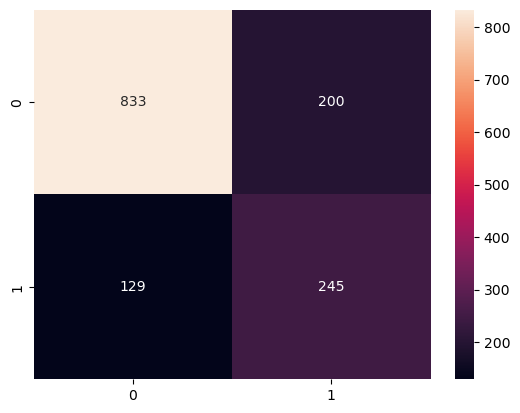

In [66]:
sns.heatmap(cm, annot=True, fmt='d')

In [67]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [68]:
final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [69]:
df0 = final[final['Churn']==0]
df1 = final[final['Churn']==1]

In [70]:
df0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1


In [71]:
df0_undersample = df0.sample(1869)

In [72]:
df0_undersample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5655,1,0,0,0,65,1,1,0,0,0,...,25.10,1725.00,0,0,0,0,1,0,0,0
75,0,1,0,0,56,1,1,1,1,1,...,110.50,6139.50,0,0,1,1,0,0,1,0
56,0,0,1,1,63,1,1,1,0,0,...,99.65,6311.20,0,0,1,1,0,1,0,0
3033,0,0,1,0,68,1,1,1,1,1,...,110.80,7553.60,0,0,1,0,1,0,0,0
6130,0,0,0,0,58,1,0,1,1,1,...,64.90,3795.45,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,1,0,0,0,18,1,0,0,0,0,...,20.05,358.50,0,0,0,0,0,0,0,1
3306,0,0,1,1,3,1,0,0,1,0,...,80.00,241.30,0,0,1,0,0,0,1,0
3806,0,1,0,0,18,1,0,0,1,0,...,73.55,1359.45,0,0,1,0,0,0,1,0
682,1,0,0,0,3,1,0,1,0,0,...,64.40,195.65,0,1,0,0,0,1,0,0


In [73]:
df0_undersample.shape

(1869, 24)

In [74]:
undersample = pd.concat([df0_undersample, df1])

In [75]:
undersample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5655,1,0,0,0,65,1,1,0,0,0,...,25.10,1725.00,0,0,0,0,1,0,0,0
75,0,1,0,0,56,1,1,1,1,1,...,110.50,6139.50,0,0,1,1,0,0,1,0
56,0,0,1,1,63,1,1,1,0,0,...,99.65,6311.20,0,0,1,1,0,1,0,0
3033,0,0,1,0,68,1,1,1,1,1,...,110.80,7553.60,0,0,1,0,1,0,0,0
6130,0,0,0,0,58,1,0,1,1,1,...,64.90,3795.45,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,...,59.80,727.80,1,1,0,1,0,0,1,0
7026,0,0,0,0,9,1,0,0,0,0,...,44.20,403.35,1,1,0,0,0,0,0,0
7032,1,1,0,0,1,1,1,0,0,0,...,75.75,75.75,1,0,1,0,0,0,1,0
7034,0,0,0,0,67,1,1,1,1,1,...,102.95,6886.25,1,0,1,0,0,1,0,0


In [76]:
col = undersample[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [77]:
undersample[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(col)

In [78]:
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5655,1,0,0,0,0.901408,1,1,0,0,0,...,0.063755,0.196884,0,0,0,0,1,0,0,0
75,0,1,0,0,0.774648,1,1,1,1,1,...,0.921185,0.706289,0,0,1,1,0,0,1,0
56,0,0,1,1,0.873239,1,1,1,0,0,...,0.812249,0.726102,0,0,1,1,0,1,0,0
3033,0,0,1,0,0.943662,1,1,1,1,1,...,0.924197,0.869467,0,0,1,0,1,0,0,0
6130,0,0,0,0,0.802817,1,0,1,1,1,...,0.463353,0.435801,0,1,0,0,1,1,0,0


In [79]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(undersample.drop('Churn', axis=1), undersample.Churn, test_size=0.20, random_state=42)

In [80]:
X_train_min.shape

(2990, 23)

In [81]:
X_test_min.shape

(748, 23)

In [82]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(23, ), activation = 'sigmoid')
])

In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [84]:
model.fit(X_train_min, y_train_min, epochs=10)

Epoch 1/10
94/94 [==============================] - 1s 3ms/step - loss: 0.6547 - Accuracy: 0.6291
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 0.6223 - Accuracy: 0.6622
Epoch 3/10
94/94 [==============================] - 0s 3ms/step - loss: 0.6010 - Accuracy: 0.6910
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5838 - Accuracy: 0.7070
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5702 - Accuracy: 0.7187
Epoch 6/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5593 - Accuracy: 0.7278
Epoch 7/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5502 - Accuracy: 0.7328
Epoch 8/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5427 - Accuracy: 0.7365
Epoch 9/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5366 - Accuracy: 0.7385
Epoch 10/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5313 - Accuracy: 0.7455


In [85]:
sum0, sum1 = final['Churn'].value_counts()

In [86]:
sum1

1869

In [87]:
sum0

5163

In [88]:
df1_oversample = df1.sample(sum0, replace=True)

In [89]:
df1_oversample.shape

(5163, 24)

In [113]:
oversample = pd.concat([df0, df1_oversample])

In [115]:
df0.shape

(5163, 24)

In [114]:
oversample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1


In [90]:
!pip install imbalanced_learn

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
smote =SMOTE(sampling_strategy='minority')

In [93]:
X = final.drop('Churn', axis=1)

In [94]:
y = final.Churn

In [95]:
X_sm, y_sm = smote.fit_resample(X, y)

In [96]:
X_sm.shape

(10326, 23)

In [97]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.20)

In [98]:
X_train_sm.shape

(8260, 23)

In [99]:
X_test_sm.shape

(2066, 23)

In [100]:
X_test_sm

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
706,1,1,0,0,27,1,1,0,1,0,...,1,104.650000,2964.000000,0,1,1,0,0,0,0
9873,0,0,0,0,62,1,1,0,0,0,...,0,99.661728,6136.122553,0,1,1,0,0,0,0
991,1,0,0,0,13,1,0,0,0,0,...,0,20.000000,268.450000,0,0,0,1,1,0,0
6453,1,0,0,0,2,1,0,0,1,0,...,0,95.650000,167.300000,0,1,0,0,0,1,0
9169,1,0,0,0,55,1,0,0,1,0,...,1,103.397169,5642.496067,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,1,0,0,0,45,0,0,0,1,0,...,0,30.303129,1378.823326,1,0,0,0,0,0,0
9642,0,1,0,0,37,0,0,0,0,0,...,1,75.284932,2867.400570,0,0,0,0,0,1,0
8048,0,0,0,0,1,1,0,0,0,0,...,1,50.157698,50.157698,1,0,0,0,0,0,1
7381,1,0,0,0,1,1,0,0,0,0,...,0,44.775425,44.775425,1,0,0,0,0,0,1


In [101]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(23, ), activation='sigmoid')
])

In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [103]:
model.fit(X_train_sm, y_train_sm, epochs=10)

Epoch 1/10
259/259 [==============================] - 2s 3ms/step - loss: 3.0241 - Accuracy: 0.4889
Epoch 2/10
259/259 [==============================] - 1s 3ms/step - loss: 0.6095 - Accuracy: 0.7206
Epoch 3/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5742 - Accuracy: 0.7406
Epoch 4/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5473 - Accuracy: 0.7448
Epoch 5/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5049 - Accuracy: 0.7646
Epoch 6/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4936 - Accuracy: 0.7697
Epoch 7/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4896 - Accuracy: 0.7785
Epoch 8/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4964 - Accuracy: 0.7776
Epoch 9/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4518 - Accuracy: 0.7912
Epoch 10/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4529 - Accuracy: 0.7932

In [104]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.5116 - Accuracy: 0.7569


[0.5115998387336731, 0.7569296360015869]

In [105]:
import pandas as pd

In [106]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [107]:
y_pred

array([[0.12160718],
       [0.5293526 ],
       [0.20174399],
       ...,
       [0.16326593],
       [0.03968313],
       [0.11279134]], dtype=float32)

In [108]:
l1 = []
for i in y_pred:
    if i > 0.5:
        l1.append(1)
    else:
        l1.append(0)

In [109]:
l1

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


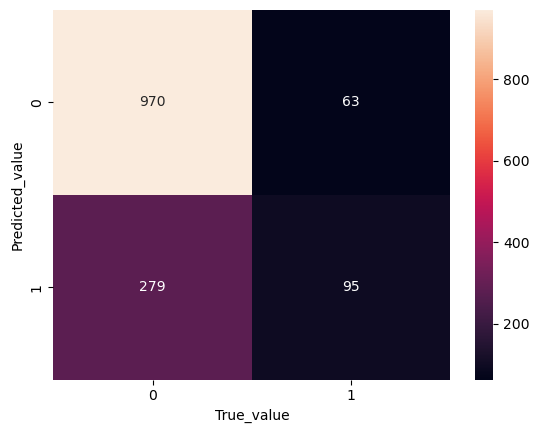

In [110]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=l1)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test, l1))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1033
           1       0.60      0.25      0.36       374

    accuracy                           0.76      1407
   macro avg       0.69      0.60      0.60      1407
weighted avg       0.73      0.76      0.72      1407

